# EINmodel for desicion making

Found 1 parameter sets with 2 attractors.


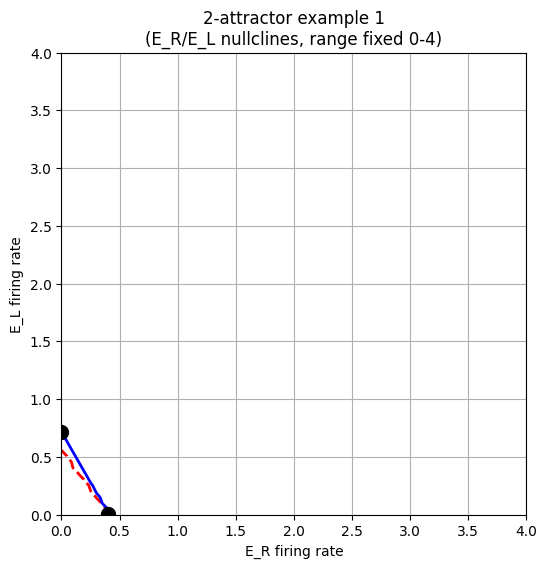

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def threshold_linear(x, gain=1.0, theta=0.0):
    return np.maximum(gain * x - theta, 0)
def phi_E(x):
    return threshold_linear(x, gain=1.0, theta=-0.1)
def phi_I(x):
    return threshold_linear(x, gain=4.0, theta=5.0)

tau_E = 10.0
tau_I = 5.0

def dX_dt(X, par):
    E_R, E_L, I_R, I_L = X
    (WEE_RR, WEE_RL, WEE_LR, WEE_LL,
     WEI_RR, WEI_LR, WEI_RL, WEI_LL,
     WIE_R, WIE_L, WIE_Rp, WIE_Lp,
     IE_R, IE_L) = par

    dE_R = (-E_R + phi_E(WEE_RR*E_R + WEE_RL*E_L - WEI_RR*I_R - WEI_LR*I_L + IE_R)) / tau_E
    dE_L = (-E_L + phi_E(WEE_LL*E_L + WEE_LR*E_R - WEI_LL*I_L - WEI_RL*I_R + IE_L)) / tau_E
    dI_R = (-I_R + phi_I(WIE_R*E_R + WIE_L*E_L)) / tau_I
    dI_L = (-I_L + phi_I(WIE_Rp*E_R + WIE_Lp*E_L)) / tau_I
    return np.array([dE_R, dE_L, dI_R, dI_L])

n_samples = 100
E_grid = np.linspace(0, 2.0, 4)
I_grid = np.linspace(0, 2.0, 4)
X0_grid = np.array([[e_r, e_l, i_r, i_l]
                    for e_r in E_grid
                    for e_l in E_grid
                    for i_r in I_grid
                    for i_l in I_grid])

np.random.seed(42)
two_attractor_params = []
for s in range(n_samples):
    par = np.random.uniform(0.5, 4.0, 12)
    inputs = np.random.uniform(0.0, 4.0, 2)
    full_par = np.concatenate([par, inputs])
    roots = []
    for X0 in X0_grid:
        sol = root(lambda X: dX_dt(X, full_par), X0, method='hybr')
        if sol.success:
            X_fp = np.round(sol.x, decimals=3)
            if np.all(X_fp >= 0) and np.all(X_fp <= 4.0):
                if not any(np.linalg.norm(X_fp - r) < 0.05 for r in roots):
                    roots.append(X_fp)
    if len(roots) == 2:
        two_attractor_params.append({
            "params": full_par,
            "fixed_points": roots
        })

print(f"Found {len(two_attractor_params)} parameter sets with 2 attractors.")

# 可視化（E_R vs E_Lのみ2D投影, nullcline追加, 範囲0-4固定）
for idx, res in enumerate(two_attractor_params):
    fig, ax = plt.subplots(figsize=(6,6))
    # nullcline計算用グリッド
    E_range = np.linspace(0, 4, 80)
    E_R_grid, E_L_grid = np.meshgrid(E_range, E_range)
    dER = np.zeros_like(E_R_grid)
    dEL = np.zeros_like(E_L_grid)
    # I_R, I_LはE_R, E_Lの関数として近似（steady-state）
    for i in range(E_R_grid.shape[0]):
        for j in range(E_L_grid.shape[1]):
            E_R = E_R_grid[i, j]
            E_L = E_L_grid[i, j]
            # I_R, I_Lをsteady-state近似
            p = res["params"]
            I_R = phi_I(p[8]*E_R + p[9]*E_L)
            I_L = phi_I(p[10]*E_R + p[11]*E_L)
            dER[i, j] = (-E_R + phi_E(p[0]*E_R + p[1]*E_L - p[4]*I_R - p[5]*I_L + p[12])) / tau_E
            dEL[i, j] = (-E_L + phi_E(p[3]*E_L + p[2]*E_R - p[7]*I_L - p[6]*I_R + p[13])) / tau_E
    # nullcline等高線
    c1 = ax.contour(E_R_grid, E_L_grid, dER, levels=[0], colors='red', linewidths=2, linestyles='--')
    c2 = ax.contour(E_R_grid, E_L_grid, dEL, levels=[0], colors='blue', linewidths=2, linestyles='-')
    # 固定点
    for pt in res["fixed_points"]:
        ax.plot(pt[0], pt[1], 'ko', markersize=10)
    ax.set_xlim(0,4)
    ax.set_ylim(0,4)
    ax.set_xlabel("E_R firing rate")
    ax.set_ylabel("E_L firing rate")
    ax.set_title(
        f"2-attractor example {idx+1}\n"
        f"(E_R/E_L nullclines, range fixed 0-4)"
    )
    ax.grid()
    plt.show()


Found 2 parameter sets with 2 attractors.


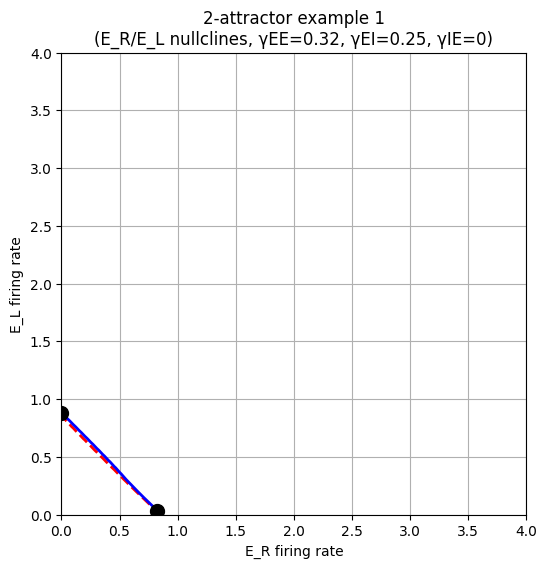

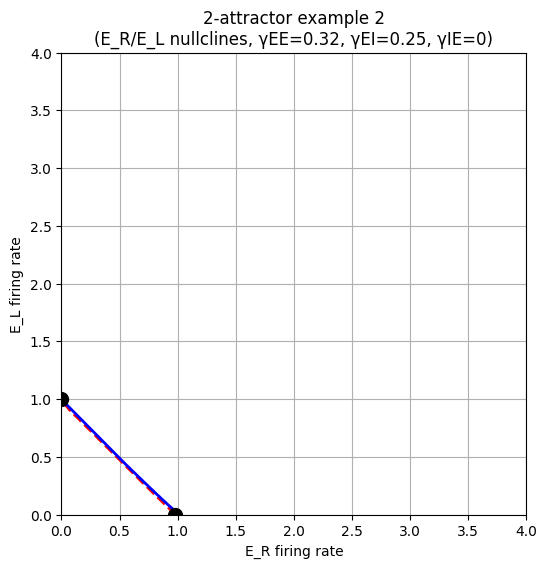

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def threshold_linear(x, gain=1.0, theta=0.0):
    return np.maximum(gain * x - theta, 0)
def phi_E(x):
    return threshold_linear(x, gain=1.0, theta=-0.1)
def phi_I(x):
    return threshold_linear(x, gain=4.0, theta=5.0)

tau_E = 10.0
tau_I = 5.0

def dX_dt(X, par):
    E_R, E_L, I_R, I_L = X
    (WEE_RR, WEE_RL, WEE_LR, WEE_LL,
     WEI_RR, WEI_LR, WEI_RL, WEI_LL,
     WIE_R, WIE_L, WIE_Rp, WIE_Lp,
     IE_R, IE_L) = par

    dE_R = (-E_R + phi_E(WEE_RR*E_R + WEE_RL*E_L - WEI_RR*I_R - WEI_LR*I_L + IE_R)) / tau_E
    dE_L = (-E_L + phi_E(WEE_LL*E_L + WEE_LR*E_R - WEI_LL*I_L - WEI_RL*I_R + IE_L)) / tau_E
    dI_R = (-I_R + phi_I(WIE_R*E_R + WIE_L*E_L)) / tau_I
    dI_L = (-I_L + phi_I(WIE_Rp*E_R + WIE_Lp*E_L)) / tau_I
    return np.array([dE_R, dE_L, dI_R, dI_L])

# 1. γ値を指定
gamma_EE = 0.32
gamma_EI = 0.25
gamma_IE = 0

# 2. サーチ対象：スカラー結合重みを乱数でサーチ
n_samples = 100
E_grid = np.linspace(0, 2.0, 4)
I_grid = np.linspace(0, 2.0, 4)
X0_grid = np.array([[e_r, e_l, i_r, i_l]
                    for e_r in E_grid
                    for e_l in E_grid
                    for i_r in I_grid
                    for i_l in I_grid])

np.random.seed(42)
two_attractor_params = []
for s in range(n_samples):
    # スカラー重みパラメータのみ乱数でサーチ
    WEE = np.random.uniform(0.5, 4.0)
    WEI = np.random.uniform(0.5, 4.0)
    WIE = np.random.uniform(0.5, 4.0)
    # γで接続特異性を反映
    WEE_RR = WEE_LL = WEE * (1 + gamma_EE)
    WEE_RL = WEE_LR = WEE * (1 - gamma_EE)
    WEI_RR = WEI_LL = WEI * (1 + gamma_EI)
    WEI_RL = WEI_LR = WEI * (1 - gamma_EI)
    WIE_R  = WIE * (1 + gamma_IE)
    WIE_L  = WIE * (1 - gamma_IE)
    WIE_Rp = WIE * (1 + gamma_IE)
    WIE_Lp = WIE * (1 - gamma_IE)
    # 入力も乱数
    IE_R, IE_L = np.random.uniform(0.0, 4.0, 2)
    full_par = np.array([WEE_RR, WEE_RL, WEE_LR, WEE_LL,
                         WEI_RR, WEI_LR, WEI_RL, WEI_LL,
                         WIE_R, WIE_L, WIE_Rp, WIE_Lp,
                         IE_R, IE_L])
    roots = []
    for X0 in X0_grid:
        sol = root(lambda X: dX_dt(X, full_par), X0, method='hybr')
        if sol.success:
            X_fp = np.round(sol.x, decimals=3)
            if np.all(X_fp >= 0) and np.all(X_fp <= 4.0):
                if not any(np.linalg.norm(X_fp - r) < 0.05 for r in roots):
                    roots.append(X_fp)
    if len(roots) == 2:
        two_attractor_params.append({
            "params": full_par,
            "fixed_points": roots
        })

print(f"Found {len(two_attractor_params)} parameter sets with 2 attractors.")

# 可視化（E_R vs E_Lのみ2D投影, nullcline追加, 範囲0-4固定）
for idx, res in enumerate(two_attractor_params):
    fig, ax = plt.subplots(figsize=(6,6))
    E_range = np.linspace(0, 4, 80)
    E_R_grid, E_L_grid = np.meshgrid(E_range, E_range)
    dER = np.zeros_like(E_R_grid)
    dEL = np.zeros_like(E_L_grid)
    p = res["params"]
    for i in range(E_R_grid.shape[0]):
        for j in range(E_L_grid.shape[1]):
            E_R = E_R_grid[i, j]
            E_L = E_L_grid[i, j]
            I_R = phi_I(p[8]*E_R + p[9]*E_L)
            I_L = phi_I(p[10]*E_R + p[11]*E_L)
            dER[i, j] = (-E_R + phi_E(p[0]*E_R + p[1]*E_L - p[4]*I_R - p[5]*I_L + p[12])) / tau_E
            dEL[i, j] = (-E_L + phi_E(p[3]*E_L + p[2]*E_R - p[7]*I_L - p[6]*I_R + p[13])) / tau_E
    c1 = ax.contour(E_R_grid, E_L_grid, dER, levels=[0], colors='red', linewidths=2, linestyles='--')
    c2 = ax.contour(E_R_grid, E_L_grid, dEL, levels=[0], colors='blue', linewidths=2, linestyles='-')
    for pt in res["fixed_points"]:
        ax.plot(pt[0], pt[1], 'ko', markersize=10)
    ax.set_xlim(0,4)
    ax.set_ylim(0,4)
    ax.set_xlabel("E_R firing rate")
    ax.set_ylabel("E_L firing rate")
    ax.set_title(
        f"2-attractor example {idx+1}\n"
        f"(E_R/E_L nullclines, γEE={gamma_EE}, γEI={gamma_EI}, γIE={gamma_IE})"
    )
    ax.grid()
    plt.show()


Found 3 fixed points.


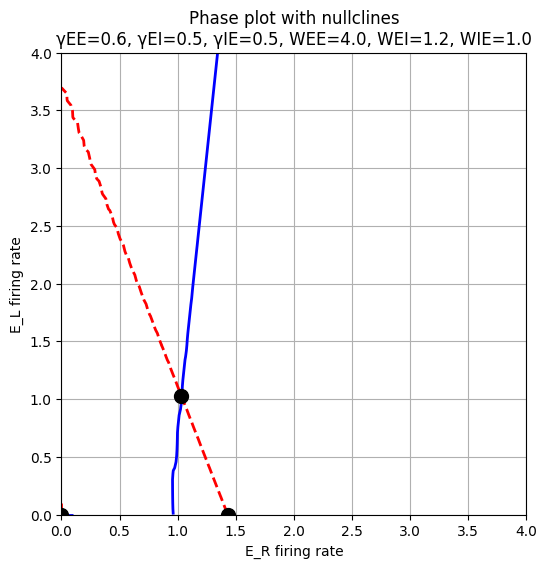

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def threshold_linear(x, gain=1.0, theta=0.0):
    return np.maximum(gain * x - theta, 0)
def phi_E(x):
    return threshold_linear(x, gain=4.0, theta=1.0)
def phi_I(x):
    return threshold_linear(x, gain=4.0, theta=5.0)

tau_E = 10.0
tau_I = 5.0

def dX_dt(X, par):
    E_R, E_L, I_R, I_L = X
    (WEE_RR, WEE_RL, WEE_LR, WEE_LL,
     WEI_RR, WEI_LR, WEI_RL, WEI_LL,
     WIE_R, WIE_L, WIE_Rp, WIE_Lp,
     IE_R, IE_L) = par

    dE_R = (-E_R + phi_E(WEE_RR*E_R + WEE_RL*E_L - WEI_RR*I_R - WEI_LR*I_L + IE_R)) / tau_E
    dE_L = (-E_L + phi_E(WEE_LL*E_L + WEE_LR*E_R - WEI_LL*I_L - WEI_RL*I_R + IE_L)) / tau_E
    dI_R = (-I_R + phi_I(WIE_R*E_R + WIE_L*E_L)) / tau_I
    dI_L = (-I_L + phi_I(WIE_Rp*E_R + WIE_Lp*E_L)) / tau_I
    return np.array([dE_R, dE_L, dI_R, dI_L])

# ---- 推奨パラメータ設定 ----
gamma_EE = 0.6  # 集団特異性最大
gamma_EI = 0.5
gamma_IE = 0.5

WEE = 4.0  # 強め
WEI = 1.2  # 強め
WIE = 1.0  # 十分

# γで結合特異性を反映
WEE_RR = WEE_LL = WEE * (1 + gamma_EE)
WEE_RL = WEE_LR = WEE * (1 - gamma_EE)
WEI_RR = WEI_LL = WEI * (1 + gamma_EI)
WEI_RL = WEI_LR = WEI * (1 - gamma_EI)
WIE_R  = WIE * (1 + gamma_IE)
WIE_L  = WIE * (1 - gamma_IE)
WIE_Rp = WIE * (1 + gamma_IE)
WIE_Lp = WIE * (1 - gamma_IE)

IE_R = IE_L = 0.05

# パラメータベクトル
full_par = np.array([WEE_RR, WEE_RL, WEE_LR, WEE_LL,
                     WEI_RR, WEI_LR, WEI_RL, WEI_LL,
                     WIE_R, WIE_L, WIE_Rp, WIE_Lp,
                     IE_R, IE_L])

# 固定点探索
E_grid = np.linspace(0, 2.0, 4)
I_grid = np.linspace(0, 2.0, 4)
X0_grid = np.array([[e_r, e_l, i_r, i_l]
                    for e_r in E_grid
                    for e_l in E_grid
                    for i_r in I_grid
                    for i_l in I_grid])

roots = []
for X0 in X0_grid:
    sol = root(lambda X: dX_dt(X, full_par), X0, method='hybr')
    if sol.success:
        X_fp = np.round(sol.x, decimals=3)
        if np.all(X_fp >= 0) and np.all(X_fp <= 4.0):
            if not any(np.linalg.norm(X_fp - r) < 0.05 for r in roots):
                roots.append(X_fp)

print(f"Found {len(roots)} fixed points.")

# phaseplot（E_R vs E_L, nullcline付き）
fig, ax = plt.subplots(figsize=(6,6))
E_range = np.linspace(0, 4, 80)
E_R_grid, E_L_grid = np.meshgrid(E_range, E_range)
dER = np.zeros_like(E_R_grid)
dEL = np.zeros_like(E_L_grid)
for i in range(E_R_grid.shape[0]):
    for j in range(E_L_grid.shape[1]):
        E_R = E_R_grid[i, j]
        E_L = E_L_grid[i, j]
        I_R = phi_I(full_par[8]*E_R + full_par[9]*E_L)
        I_L = phi_I(full_par[10]*E_R + full_par[11]*E_L)
        dER[i, j] = (-E_R + phi_E(full_par[0]*E_R + full_par[1]*E_L - full_par[4]*I_R - full_par[5]*I_L + full_par[12])) / tau_E
        dEL[i, j] = (-E_L + phi_E(full_par[3]*E_L + full_par[2]*E_R - full_par[7]*I_L - full_par[6]*I_R + full_par[13])) / tau_E
# nullcline等高線
c1 = ax.contour(E_R_grid, E_L_grid, dER, levels=[0], colors='red', linewidths=2, linestyles='--')
c2 = ax.contour(E_R_grid, E_L_grid, dEL, levels=[0], colors='blue', linewidths=2, linestyles='-')
# 固定点
for pt in roots:
    ax.plot(pt[0], pt[1], 'ko', markersize=10)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_xlabel("E_R firing rate")
ax.set_ylabel("E_L firing rate")
ax.set_title(
    f"Phase plot with nullclines\n"
    f"γEE={gamma_EE}, γEI={gamma_EI}, γIE={gamma_IE}, WEE={WEE}, WEI={WEI}, WIE={WIE}"
)
ax.grid()
plt.show()


Found 1 fixed points.


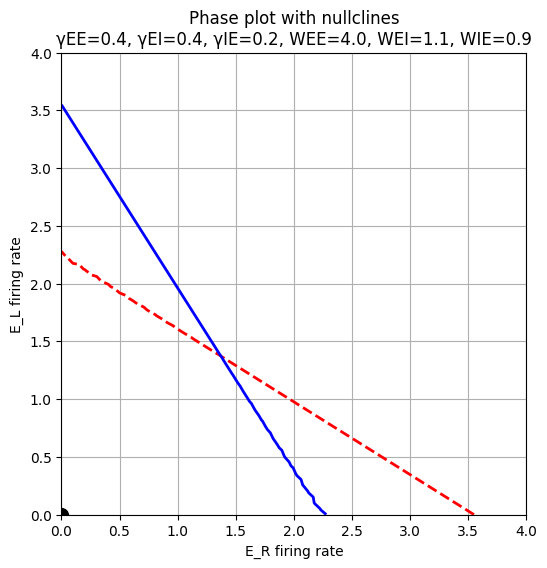

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def threshold_linear(x, gain=4.0, theta=1.0):
    return np.maximum(gain * x - theta, 0)

def phi_E(x):
    return threshold_linear(x, gain=8.0, theta=1.0)  # S字性強調
def phi_I(x):
    return threshold_linear(x, gain=4.0, theta=5.0)

tau_E = 10.0
tau_I = 5.0

# --- 推奨パラメータ設定 ---
gamma_EE = 0.4
gamma_EI = 0.4
gamma_IE = 0.2

WEE = 4.0
WEI = 1.1
WIE = 0.9

# γで結合特異性を反映（完全左右対称）
WEE_RR = WEE_LL = WEE * (1 + gamma_EE)
WEE_RL = WEE_LR = WEE * (1 - gamma_EE)
WEI_RR = WEI_LL = WEI * (1 + gamma_EI)
WEI_RL = WEI_LR = WEI * (1 - gamma_EI)
WIE_R  = WIE_Rp = WIE * (1 + gamma_IE)
WIE_L  = WIE_Lp = WIE * (1 - gamma_IE)

IE_R = IE_L = 0.05

# パラメータベクトル（indexと数式を完全対応）
full_par = np.array([
    WEE_RR, WEE_RL, WEE_LR, WEE_LL,   # 0-3
    WEI_RR, WEI_LR, WEI_RL, WEI_LL,   # 4-7
    WIE_R,  WIE_L,  WIE_Rp, WIE_Lp,   # 8-11
    IE_R,   IE_L                       # 12-13
])

def dX_dt(X, par):
    # 名前で明示的にパラメータを取り出す
    WEE_RR, WEE_RL, WEE_LR, WEE_LL = par[:4]
    WEI_RR, WEI_LR, WEI_RL, WEI_LL = par[4:8]
    WIE_R, WIE_L, WIE_Rp, WIE_Lp = par[8:12]
    IE_R, IE_L = par[12:14]
    
    E_R, E_L, I_R, I_L = X

    dE_R = (-E_R + phi_E(WEE_RR*E_R + WEE_RL*E_L - WEI_RR*I_R - WEI_LR*I_L + IE_R)) / tau_E
    dE_L = (-E_L + phi_E(WEE_LL*E_L + WEE_LR*E_R - WEI_LL*I_L - WEI_RL*I_R + IE_L)) / tau_E
    dI_R = (-I_R + phi_I(WIE_R*E_R + WIE_L*E_L)) / tau_I
    dI_L = (-I_L + phi_I(WIE_Rp*E_L + WIE_Lp*E_R)) / tau_I
    return np.array([dE_R, dE_L, dI_R, dI_L])

# --- 固定点探索 ---
E_grid = np.linspace(0, 2.0, 4)
I_grid = np.linspace(0, 2.0, 4)
X0_grid = np.array([[e_r, e_l, i_r, i_l]
                    for e_r in E_grid
                    for e_l in E_grid
                    for i_r in I_grid
                    for i_l in I_grid])

roots = []
for X0 in X0_grid:
    sol = root(lambda X: dX_dt(X, full_par), X0, method='hybr')
    if sol.success:
        X_fp = np.round(sol.x, decimals=3)
        if np.all(X_fp >= 0) and np.all(X_fp <= 4.0):
            if not any(np.linalg.norm(X_fp - r) < 0.05 for r in roots):
                roots.append(X_fp)

print(f"Found {len(roots)} fixed points.")

# --- phaseplot（E_R vs E_L, nullcline付き, 対称性保証） ---
fig, ax = plt.subplots(figsize=(6,6))
E_range = np.linspace(0, 4, 80)
E_R_grid, E_L_grid = np.meshgrid(E_range, E_range)
dER = np.zeros_like(E_R_grid)
dEL = np.zeros_like(E_L_grid)

# I_R, I_Lも完全対称計算
for i in range(E_R_grid.shape[0]):
    for j in range(E_L_grid.shape[1]):
        E_R = E_R_grid[i, j]
        E_L = E_L_grid[i, j]
        I_R = phi_I(WIE_R*E_R + WIE_L*E_L)
        I_L = phi_I(WIE_Rp*E_L + WIE_Lp*E_R)
        dER[i, j] = (-E_R + phi_E(WEE_RR*E_R + WEE_RL*E_L - WEI_RR*I_R - WEI_LR*I_L + IE_R)) / tau_E
        dEL[i, j] = (-E_L + phi_E(WEE_LL*E_L + WEE_LR*E_R - WEI_LL*I_L - WEI_RL*I_R + IE_L)) / tau_E

# nullcline等高線
c1 = ax.contour(E_R_grid, E_L_grid, dER, levels=[0], colors='red', linewidths=2, linestyles='--')
c2 = ax.contour(E_R_grid, E_L_grid, dEL, levels=[0], colors='blue', linewidths=2, linestyles='-')
# 固定点
for pt in roots:
    ax.plot(pt[0], pt[1], 'ko', markersize=10)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_xlabel("E_R firing rate")
ax.set_ylabel("E_L firing rate")
ax.set_title(
    f"Phase plot with nullclines\n"
    f"γEE={gamma_EE}, γEI={gamma_EI}, γIE={gamma_IE}, WEE={WEE}, WEI={WEI}, WIE={WIE}"
)
ax.grid()
plt.show()


Found 0 fixed points.


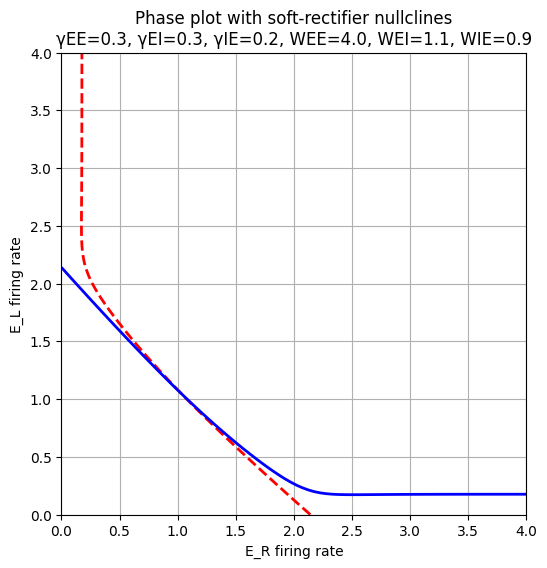

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

# --- soft-rectifier活性化関数 ---

def soft_rectifier(x, a=6.0, b=1.6, d=1.0, min_rate=0.2, smooth=0.1):
    val = a * x - b
    val = np.clip(val, -100, 100)
    denom = 1 - np.exp(-d * val)
    out = np.zeros_like(x)
    mask = np.abs(denom) > 1e-6
    out[mask] = val[mask] / denom[mask]
    # --- 滑らかな下限 ---
    # シグモイドで滑らかにmin_rateへ
    out = min_rate + (out - min_rate) * (1 / (1 + np.exp(-(out - min_rate)/smooth)))
    return out

def phi_E(x):
    return soft_rectifier(np.array(x), a=3.5, b=4, d=0.25)
def phi_I(x):
    return soft_rectifier(np.array(x), a=4.0, b=3.0, d=1, min_rate=0)

tau_E = 10.0
tau_I = 5.0

# --- 推奨パラメータ設定 ---
gamma_EE = 0.3
gamma_EI = 0.3
gamma_IE = 0.2

WEE = 4.0
WEI = 1.1
WIE = 0.9


# γで結合特異性を反映（完全左右対称）
WEE_RR = WEE_LL = WEE * (1 + gamma_EE)
WEE_RL = WEE_LR = WEE * (1 - gamma_EE)
WEI_RR = WEI_LL = WEI * (1 + gamma_EI)
WEI_RL = WEI_LR = WEI * (1 - gamma_EI)
WIE_R  = WIE_Rp = WIE * (1 + gamma_IE)
WIE_L  = WIE_Lp = WIE * (1 - gamma_IE)

IE_R = IE_L = 0.2

full_par = np.array([
    WEE_RR, WEE_RL, WEE_LR, WEE_LL,
    WEI_RR, WEI_LR, WEI_RL, WEI_LL,
    WIE_R,  WIE_L,  WIE_Rp, WIE_Lp,
    IE_R,   IE_L
])

def dX_dt(X, par):
    WEE_RR, WEE_RL, WEE_LR, WEE_LL = par[:4]
    WEI_RR, WEI_LR, WEI_RL, WEI_LL = par[4:8]
    WIE_R, WIE_L, WIE_Rp, WIE_Lp = par[8:12]
    IE_R, IE_L = par[12:14]
    
    E_R, E_L, I_R, I_L = X

    dE_R = (-E_R + phi_E(WEE_RR*E_R + WEE_RL*E_L - WEI_RR*I_R - WEI_LR*I_L + IE_R)) / tau_E
    dE_L = (-E_L + phi_E(WEE_LL*E_L + WEE_LR*E_R - WEI_LL*I_L - WEI_RL*I_R + IE_L)) / tau_E
    dI_R = (-I_R + phi_I(WIE_R*E_R + WIE_L*E_L)) / tau_I
    dI_L = (-I_L + phi_I(WIE_Rp*E_L + WIE_Lp*E_R)) / tau_I
    return np.array([dE_R, dE_L, dI_R, dI_L])

# --- 固定点探索 ---
E_grid = np.linspace(0, 2.0, 4)
I_grid = np.linspace(0, 2.0, 4)
X0_grid = np.array([[e_r, e_l, i_r, i_l]
                    for e_r in E_grid
                    for e_l in E_grid
                    for i_r in I_grid
                    for i_l in I_grid])

roots = []
for X0 in X0_grid:
    sol = root(lambda X: dX_dt(X, full_par), X0, method='hybr')
    if sol.success:
        X_fp = np.round(sol.x, decimals=3)
        if np.all(X_fp >= 0) and np.all(X_fp <= 4.0):
            if not any(np.linalg.norm(X_fp - r) < 0.05 for r in roots):
                roots.append(X_fp)

print(f"Found {len(roots)} fixed points.")

# --- phaseplot（E_R vs E_L, nullcline付き, 対称性保証） ---
fig, ax = plt.subplots(figsize=(6,6))
E_range = np.linspace(0, 4, 80)
E_R_grid, E_L_grid = np.meshgrid(E_range, E_range)
dER = np.zeros_like(E_R_grid)
dEL = np.zeros_like(E_L_grid)

for i in range(E_R_grid.shape[0]):
    for j in range(E_L_grid.shape[1]):
        E_R = E_R_grid[i, j]
        E_L = E_L_grid[i, j]
        I_R = phi_I(WIE_R*E_R + WIE_L*E_L)
        I_L = phi_I(WIE_Rp*E_L + WIE_Lp*E_R)
        dER[i, j] = (-E_R + phi_E(WEE_RR*E_R + WEE_RL*E_L - WEI_RR*I_R - WEI_LR*I_L + IE_R)) / tau_E
        dEL[i, j] = (-E_L + phi_E(WEE_LL*E_L + WEE_LR*E_R - WEI_LL*I_L - WEI_RL*I_R + IE_L)) / tau_E

c1 = ax.contour(E_R_grid, E_L_grid, dER, levels=[0], colors='red', linewidths=2, linestyles='--')
c2 = ax.contour(E_R_grid, E_L_grid, dEL, levels=[0], colors='blue', linewidths=2, linestyles='-')
for pt in roots:
    ax.plot(pt[0], pt[1], 'ko', markersize=10)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_xlabel("E_R firing rate")
ax.set_ylabel("E_L firing rate")
ax.set_title(
    f"Phase plot with soft-rectifier nullclines\n"
    f"γEE={gamma_EE}, γEI={gamma_EI}, γIE={gamma_IE}, WEE={WEE}, WEI={WEI}, WIE={WIE}"
)
ax.grid()
plt.show()


Found 0 fixed points.


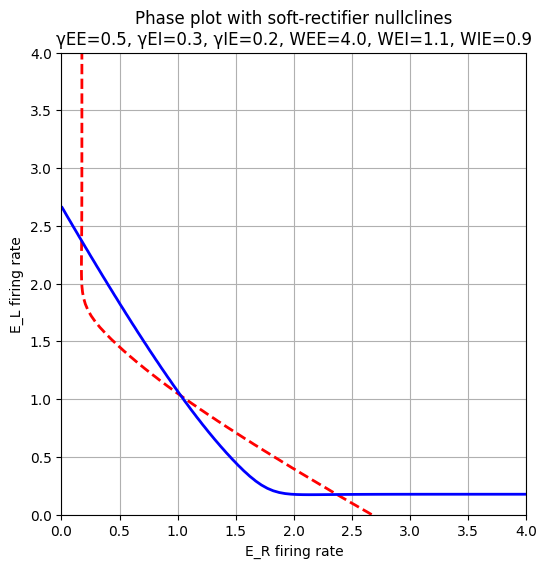

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

# --- soft-rectifier活性化関数 ---

def soft_rectifier(x, a=6.0, b=1.6, d=1.0, min_rate=0.2, smooth=0.1):
    val = a * x - b
    val = np.clip(val, -100, 100)
    denom = 1 - np.exp(-d * val)
    out = np.zeros_like(x)
    mask = np.abs(denom) > 1e-6
    out[mask] = val[mask] / denom[mask]
    # --- 滑らかな下限 ---
    # シグモイドで滑らかにmin_rateへ
    out = min_rate + (out - min_rate) * (1 / (1 + np.exp(-(out - min_rate)/smooth)))
    return out

def phi_E(x):
    return soft_rectifier(np.array(x), a=3.5, b=4, d=0.25)
def phi_I(x):
    return soft_rectifier(np.array(x), a=4.0, b=3.0, d=1, min_rate=0)

tau_E = 10.0
tau_I = 5.0

# --- 推奨パラメータ設定 ---
gamma_EE = 0.5
gamma_EI = 0.3
gamma_IE = 0.2

WEE = 4.0
WEI = 1.1
WIE = 0.9


# γで結合特異性を反映（完全左右対称）
WEE_RR = WEE_LL = WEE * (1 + gamma_EE)
WEE_RL = WEE_LR = WEE * (1 - gamma_EE)
WEI_RR = WEI_LL = WEI * (1 + gamma_EI)
WEI_RL = WEI_LR = WEI * (1 - gamma_EI)
WIE_R  = WIE_Rp = WIE * (1 + gamma_IE)
WIE_L  = WIE_Lp = WIE * (1 - gamma_IE)

IE_R = IE_L = 0.1

full_par = np.array([
    WEE_RR, WEE_RL, WEE_LR, WEE_LL,
    WEI_RR, WEI_LR, WEI_RL, WEI_LL,
    WIE_R,  WIE_L,  WIE_Rp, WIE_Lp,
    IE_R,   IE_L
])

def dX_dt(X, par):
    WEE_RR, WEE_RL, WEE_LR, WEE_LL = par[:4]
    WEI_RR, WEI_LR, WEI_RL, WEI_LL = par[4:8]
    WIE_R, WIE_L, WIE_Rp, WIE_Lp = par[8:12]
    IE_R, IE_L = par[12:14]
    
    E_R, E_L, I_R, I_L = X

    dE_R = (-E_R + phi_E(WEE_RR*E_R + WEE_RL*E_L - WEI_RR*I_R - WEI_LR*I_L + IE_R)) / tau_E
    dE_L = (-E_L + phi_E(WEE_LL*E_L + WEE_LR*E_R - WEI_LL*I_L - WEI_RL*I_R + IE_L)) / tau_E
    dI_R = (-I_R + phi_I(WIE_R*E_R + WIE_L*E_L)) / tau_I
    dI_L = (-I_L + phi_I(WIE_Rp*E_L + WIE_Lp*E_R)) / tau_I
    return np.array([dE_R, dE_L, dI_R, dI_L])

# --- 固定点探索 ---
E_grid = np.linspace(0, 2.0, 5)
I_grid = np.linspace(0, 2.0, 5)
X0_grid = np.array([[e_r, e_l, i_r, i_l]
                    for e_r in E_grid
                    for e_l in E_grid
                    for i_r in I_grid
                    for i_l in I_grid])

roots = []
for X0 in X0_grid:
    sol = root(lambda X: dX_dt(X, full_par), X0, method='hybr')
    if sol.success:
        X_fp = np.round(sol.x, decimals=2)
        if np.all(X_fp >= 0) and np.all(X_fp <= 4.0):
            if not any(np.linalg.norm(X_fp - r) < 0.05 for r in roots):
                roots.append(X_fp)

print(f"Found {len(roots)} fixed points.")

# --- phaseplot（E_R vs E_L, nullcline付き, 対称性保証） ---
fig, ax = plt.subplots(figsize=(6,6))
E_range = np.linspace(0, 4, 80)
E_R_grid, E_L_grid = np.meshgrid(E_range, E_range)
dER = np.zeros_like(E_R_grid)
dEL = np.zeros_like(E_L_grid)

for i in range(E_R_grid.shape[0]):
    for j in range(E_L_grid.shape[1]):
        E_R = E_R_grid[i, j]
        E_L = E_L_grid[i, j]
        I_R = phi_I(WIE_R*E_R + WIE_L*E_L)
        I_L = phi_I(WIE_Rp*E_L + WIE_Lp*E_R)
        dER[i, j] = (-E_R + phi_E(WEE_RR*E_R + WEE_RL*E_L - WEI_RR*I_R - WEI_LR*I_L + IE_R)) / tau_E
        dEL[i, j] = (-E_L + phi_E(WEE_LL*E_L + WEE_LR*E_R - WEI_LL*I_L - WEI_RL*I_R + IE_L)) / tau_E

c1 = ax.contour(E_R_grid, E_L_grid, dER, levels=[0], colors='red', linewidths=2, linestyles='--')
c2 = ax.contour(E_R_grid, E_L_grid, dEL, levels=[0], colors='blue', linewidths=2, linestyles='-')
for pt in roots:
    ax.plot(pt[0], pt[1], 'ko', markersize=10)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_xlabel("E_R firing rate")
ax.set_ylabel("E_L firing rate")
ax.set_title(
    f"Phase plot with soft-rectifier nullclines\n"
    f"γEE={gamma_EE}, γEI={gamma_EI}, γIE={gamma_IE}, WEE={WEE}, WEI={WEI}, WIE={WIE}"
)
ax.grid()
plt.show()


--- Parameter set 1 ---
gamma_EE=0.40, gamma_EI=0.39, gamma_IE=0.12, WEE=3.82, WEI=1.21, WIE=1.15, IE=0.09
phi_E: a=5.97, b=1.79, d=1.01 / phi_I: a=4.42, b=5.24, d=1.13


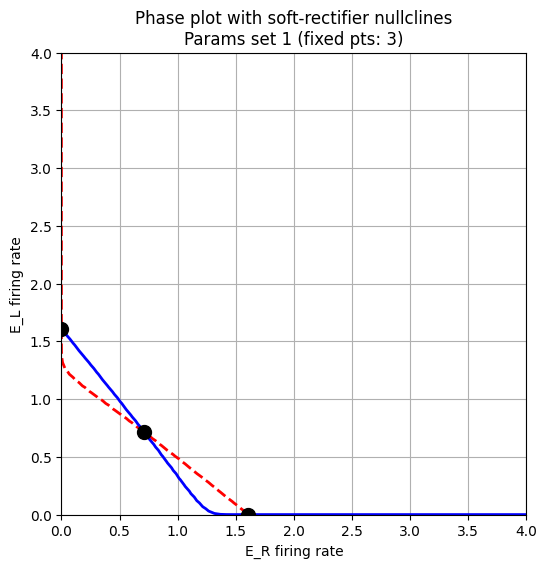

--- Parameter set 2 ---
gamma_EE=0.37, gamma_EI=0.44, gamma_IE=0.26, WEE=3.71, WEI=1.22, WIE=1.09, IE=0.11
phi_E: a=5.38, b=1.78, d=1.06 / phi_I: a=4.80, b=5.05, d=0.91


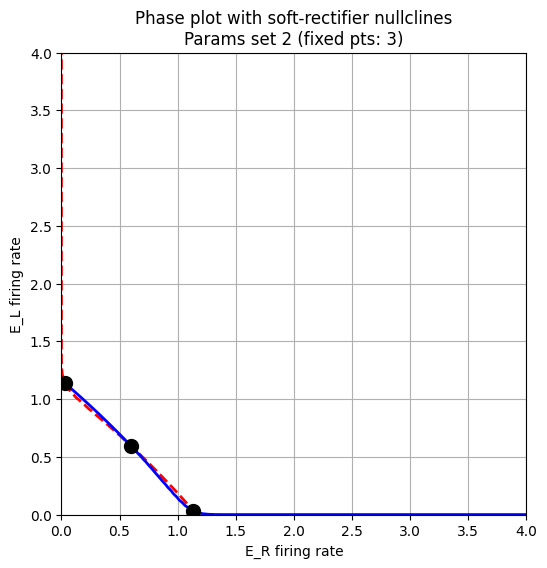

--- Parameter set 3 ---
gamma_EE=0.36, gamma_EI=0.33, gamma_IE=0.19, WEE=4.43, WEI=1.29, WIE=1.18, IE=0.13
phi_E: a=6.00, b=1.30, d=0.99 / phi_I: a=4.89, b=5.40, d=0.82


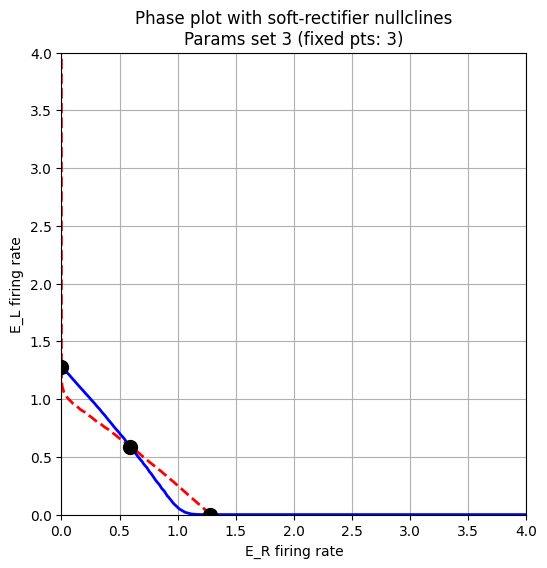

--- Parameter set 4 ---
gamma_EE=0.38, gamma_EI=0.31, gamma_IE=0.27, WEE=3.53, WEI=1.46, WIE=1.07, IE=0.19
phi_E: a=6.22, b=1.71, d=0.93 / phi_I: a=4.02, b=5.78, d=1.10


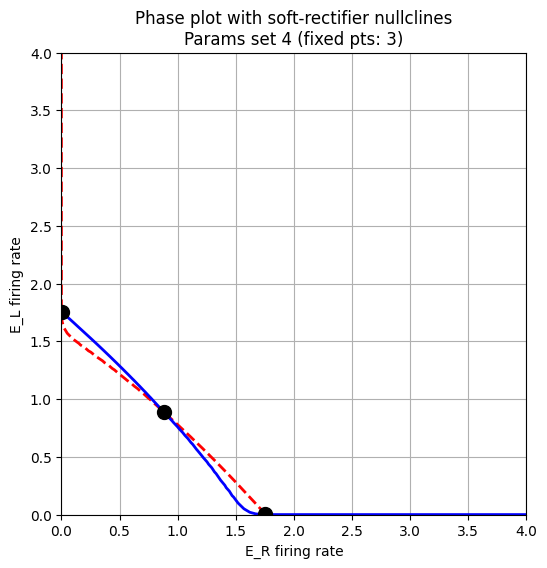

--- Parameter set 5 ---
gamma_EE=0.36, gamma_EI=0.42, gamma_IE=0.21, WEE=3.83, WEI=1.27, WIE=1.08, IE=0.19
phi_E: a=6.16, b=1.42, d=1.10 / phi_I: a=4.67, b=5.40, d=1.13


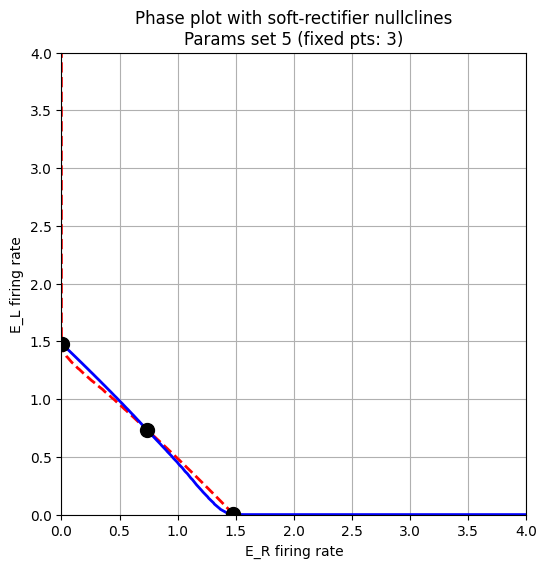

--- Parameter set 6 ---
gamma_EE=0.39, gamma_EI=0.43, gamma_IE=0.15, WEE=3.83, WEI=1.48, WIE=1.06, IE=0.17
phi_E: a=6.38, b=1.40, d=0.99 / phi_I: a=4.71, b=6.35, d=0.80


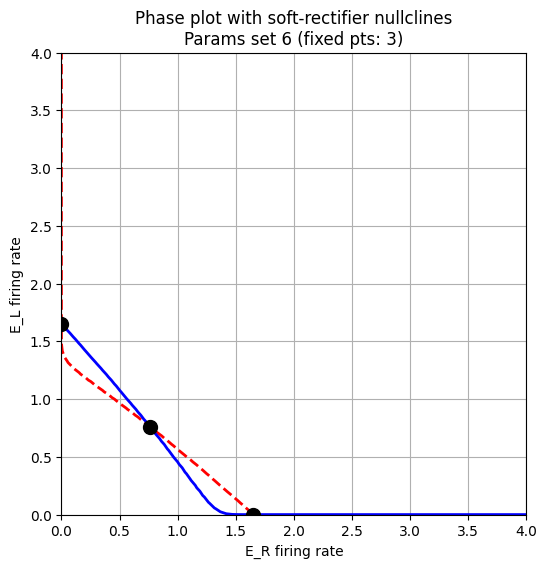

--- Parameter set 7 ---
gamma_EE=0.36, gamma_EI=0.48, gamma_IE=0.20, WEE=4.30, WEI=1.43, WIE=1.17, IE=0.10
phi_E: a=5.68, b=1.60, d=0.98 / phi_I: a=4.90, b=5.80, d=0.99


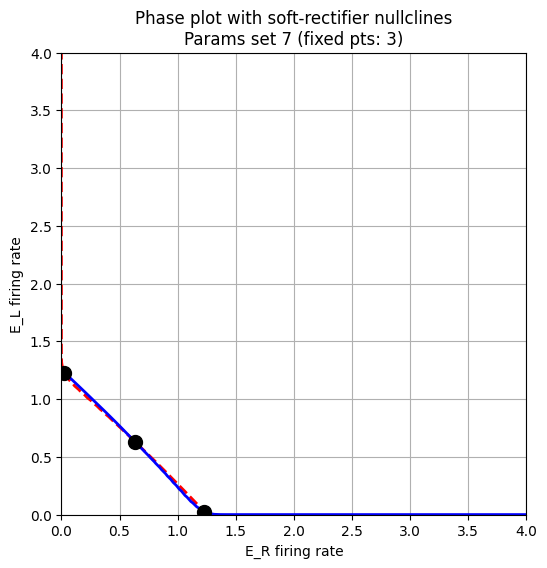

--- Parameter set 8 ---
gamma_EE=0.31, gamma_EI=0.40, gamma_IE=0.18, WEE=3.64, WEI=1.28, WIE=1.09, IE=0.15
phi_E: a=5.50, b=1.56, d=1.02 / phi_I: a=4.58, b=5.72, d=1.12


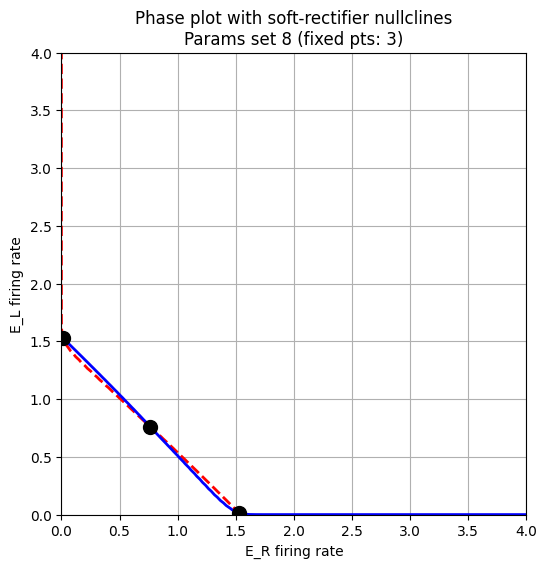

--- Parameter set 9 ---
gamma_EE=0.31, gamma_EI=0.21, gamma_IE=0.24, WEE=4.21, WEI=1.48, WIE=1.15, IE=0.12
phi_E: a=6.25, b=1.53, d=0.89 / phi_I: a=4.07, b=5.21, d=1.07


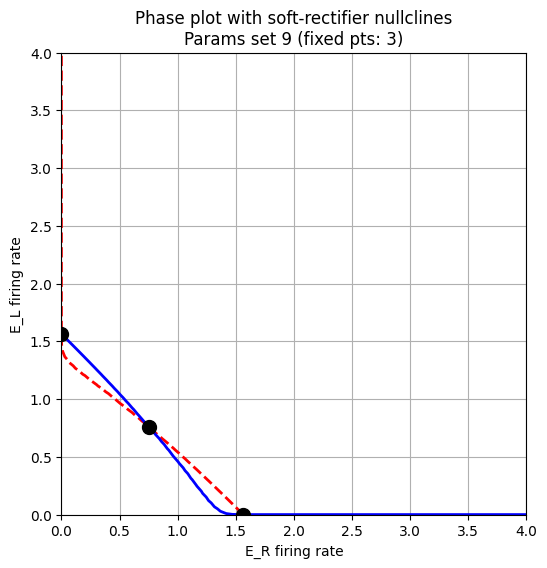

--- Parameter set 10 ---
gamma_EE=0.50, gamma_EI=0.40, gamma_IE=0.14, WEE=3.60, WEI=1.47, WIE=1.18, IE=0.14
phi_E: a=5.03, b=1.41, d=1.12 / phi_I: a=4.81, b=5.91, d=0.95


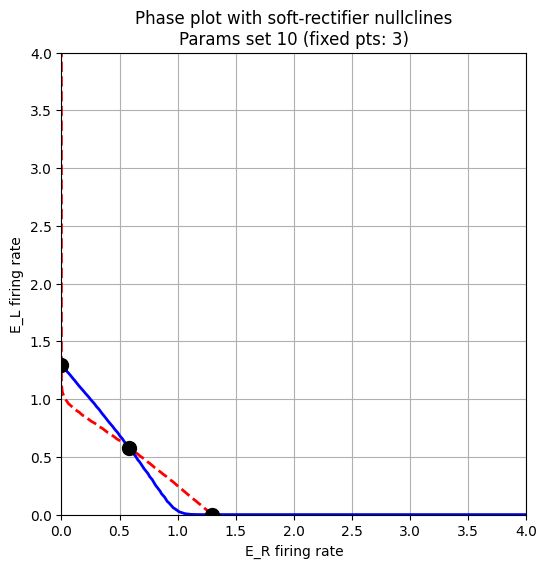

--- Parameter set 11 ---
gamma_EE=0.45, gamma_EI=0.20, gamma_IE=0.28, WEE=3.56, WEI=1.37, WIE=1.20, IE=0.13
phi_E: a=5.42, b=1.60, d=1.05 / phi_I: a=4.50, b=5.35, d=1.16


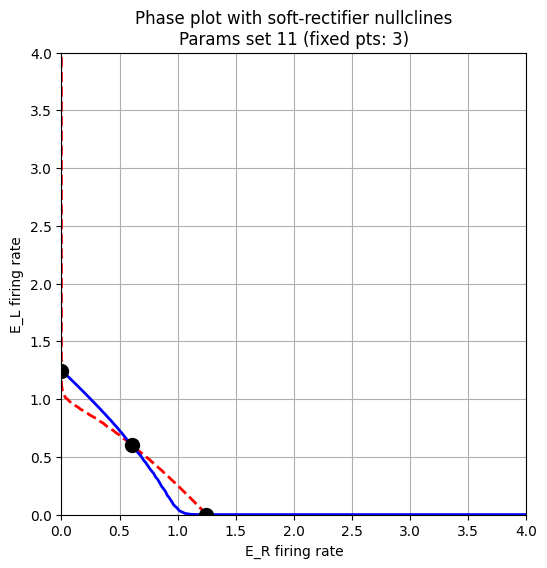

--- Parameter set 12 ---
gamma_EE=0.42, gamma_EI=0.34, gamma_IE=0.15, WEE=3.52, WEI=1.18, WIE=1.05, IE=0.10
phi_E: a=5.61, b=1.68, d=1.10 / phi_I: a=4.58, b=5.20, d=1.01


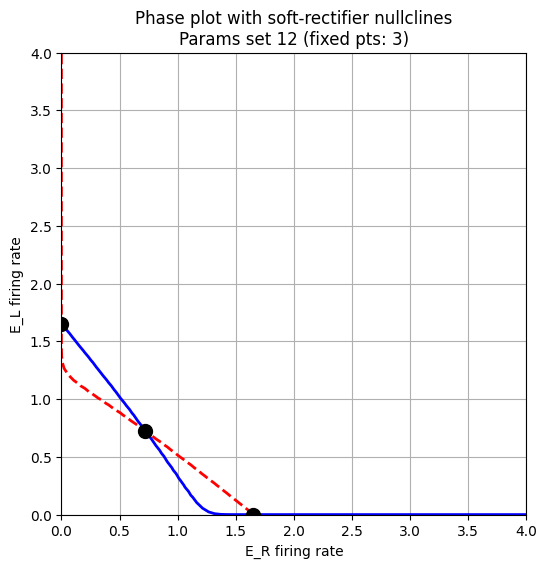

--- Parameter set 13 ---
gamma_EE=0.35, gamma_EI=0.40, gamma_IE=0.24, WEE=3.96, WEI=1.44, WIE=1.08, IE=0.18
phi_E: a=6.51, b=1.56, d=1.00 / phi_I: a=4.18, b=5.04, d=1.01


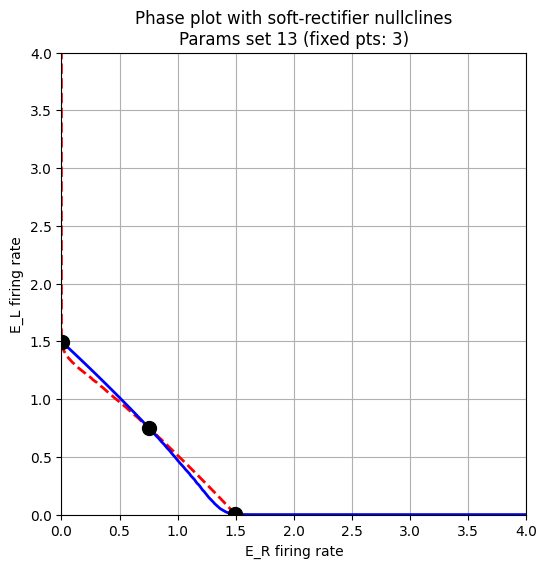

--- Parameter set 14 ---
gamma_EE=0.30, gamma_EI=0.29, gamma_IE=0.13, WEE=3.52, WEI=1.18, WIE=1.13, IE=0.10
phi_E: a=6.42, b=1.66, d=0.81 / phi_I: a=4.94, b=5.28, d=1.09


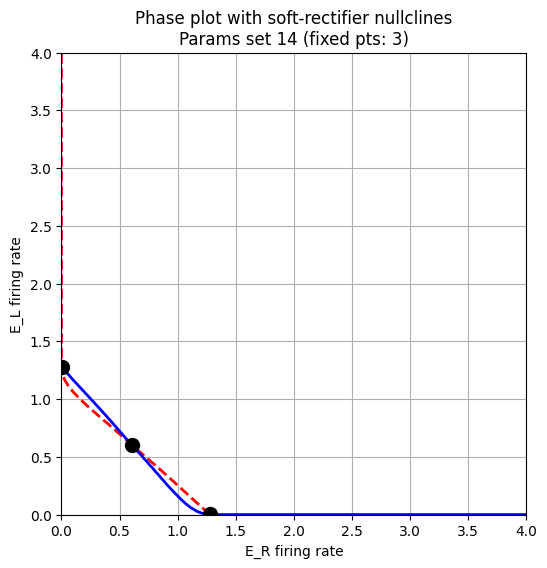

--- Parameter set 15 ---
gamma_EE=0.42, gamma_EI=0.32, gamma_IE=0.22, WEE=3.63, WEI=1.24, WIE=1.19, IE=0.11
phi_E: a=5.49, b=1.76, d=1.04 / phi_I: a=4.59, b=6.09, d=0.80


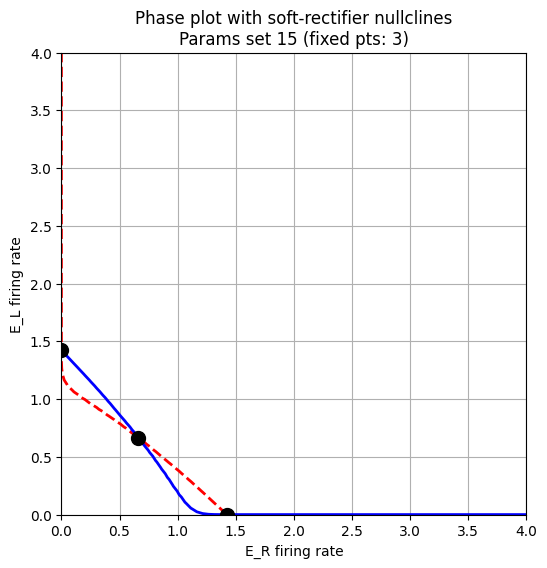

--- Parameter set 16 ---
gamma_EE=0.45, gamma_EI=0.49, gamma_IE=0.24, WEE=4.31, WEI=1.43, WIE=1.20, IE=0.09
phi_E: a=5.90, b=1.57, d=0.86 / phi_I: a=4.22, b=5.55, d=1.13


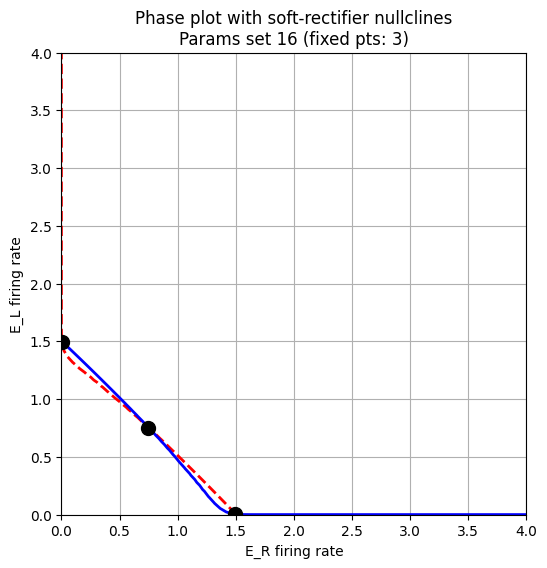

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

# --- soft-rectifier活性化関数 ---
def soft_rectifier(x, a=6.0, b=1.6, d=1.0):
    val = a * x - b
    # 0割防止。指数のオーバーフロー回避
    val = np.clip(val, -100, 100)  # 極端な値を防ぐ
    denom = 1 - np.exp(-d * val)
    out = np.zeros_like(x)
    mask = np.abs(denom) > 1e-6
    out[mask] = val[mask] / denom[mask]
    return np.maximum(out, 0)

def phi_E(x, a=6.0, b=1.6, d=1.0):
    return soft_rectifier(np.array(x), a=a, b=b, d=d)
def phi_I(x, a=4.0, b=6.0, d=1.0):
    return soft_rectifier(np.array(x), a=a, b=b, d=d)

tau_E = 10.0
tau_I = 5.0

# サーチ範囲
param_ranges = {
    "gamma_EE": (0.3, 0.5),
    "gamma_EI": (0.2, 0.5),
    "gamma_IE": (0.1, 0.3),
    "WEE": (3.5, 4.5),
    "WEI": (1.0, 1.5),
    "WIE": (0.8, 1.2),
    "IE": (0.05, 0.2),
    "aE": (5.0, 7.0),
    "bE": (1.3, 1.8),
    "dE": (0.8, 1.2),
    "aI": (3.5, 5.0),
    "bI": (5.0, 7.0),
    "dI": (0.8, 1.2)
}

def dX_dt(X, par, phi_E_params, phi_I_params):
    (WEE_RR, WEE_RL, WEE_LR, WEE_LL,
     WEI_RR, WEI_LR, WEI_RL, WEI_LL,
     WIE_R, WIE_L, WIE_Rp, WIE_Lp,
     IE_R, IE_L) = par

    E_R, E_L, I_R, I_L = X

    dE_R = (-E_R + phi_E(WEE_RR*E_R + WEE_RL*E_L - WEI_RR*I_R - WEI_LR*I_L + IE_R, *phi_E_params)) / tau_E
    dE_L = (-E_L + phi_E(WEE_LL*E_L + WEE_LR*E_R - WEI_LL*I_L - WEI_RL*I_R + IE_L, *phi_E_params)) / tau_E
    dI_R = (-I_R + phi_I(WIE_R*E_R + WIE_L*E_L, *phi_I_params)) / tau_I
    dI_L = (-I_L + phi_I(WIE_Rp*E_L + WIE_Lp*E_R, *phi_I_params)) / tau_I
    return np.array([dE_R, dE_L, dI_R, dI_L])

n_search = 100    # サーチ数
E_grid = np.linspace(0, 2.0, 4)
I_grid = np.linspace(0, 2.0, 4)
X0_grid = np.array([[e_r, e_l, i_r, i_l]
                    for e_r in E_grid
                    for e_l in E_grid
                    for i_r in I_grid
                    for i_l in I_grid])

np.random.seed(123)
found = 0
for i in range(n_search):
    gamma_EE = np.random.uniform(*param_ranges["gamma_EE"])
    gamma_EI = np.random.uniform(*param_ranges["gamma_EI"])
    gamma_IE = np.random.uniform(*param_ranges["gamma_IE"])
    WEE = np.random.uniform(*param_ranges["WEE"])
    WEI = np.random.uniform(*param_ranges["WEI"])
    WIE = np.random.uniform(*param_ranges["WIE"])
    IE_R = IE_L = np.random.uniform(*param_ranges["IE"])
    aE = np.random.uniform(*param_ranges["aE"])
    bE = np.random.uniform(*param_ranges["bE"])
    dE = np.random.uniform(*param_ranges["dE"])
    aI = np.random.uniform(*param_ranges["aI"])
    bI = np.random.uniform(*param_ranges["bI"])
    dI = np.random.uniform(*param_ranges["dI"])
    phi_E_params = (aE, bE, dE)
    phi_I_params = (aI, bI, dI)

    WEE_RR = WEE_LL = WEE * (1 + gamma_EE)
    WEE_RL = WEE_LR = WEE * (1 - gamma_EE)
    WEI_RR = WEI_LL = WEI * (1 + gamma_EI)
    WEI_RL = WEI_LR = WEI * (1 - gamma_EI)
    WIE_R  = WIE_Rp = WIE * (1 + gamma_IE)
    WIE_L  = WIE_Lp = WIE * (1 - gamma_IE)

    full_par = np.array([
        WEE_RR, WEE_RL, WEE_LR, WEE_LL,
        WEI_RR, WEI_LR, WEI_RL, WEI_LL,
        WIE_R,  WIE_L,  WIE_Rp, WIE_Lp,
        IE_R,   IE_L
    ])

    roots = []
    for X0 in X0_grid:
        sol = root(lambda X: dX_dt(X, full_par, phi_E_params, phi_I_params), X0, method='hybr')
        if sol.success:
            X_fp = np.round(sol.x, decimals=3)
            if np.all(X_fp >= 0) and np.all(X_fp <= 4.0):
                if not any(np.linalg.norm(X_fp - r) < 0.05 for r in roots):
                    roots.append(X_fp)

    # --- 2個または3個固定点でプロット ---
    if len(roots) in [2, 3]:
        found += 1
        print(f"--- Parameter set {found} ---")
        print(f"gamma_EE={gamma_EE:.2f}, gamma_EI={gamma_EI:.2f}, gamma_IE={gamma_IE:.2f}, WEE={WEE:.2f}, WEI={WEI:.2f}, WIE={WIE:.2f}, IE={IE_R:.2f}")
        print(f"phi_E: a={aE:.2f}, b={bE:.2f}, d={dE:.2f} / phi_I: a={aI:.2f}, b={bI:.2f}, d={dI:.2f}")
        fig, ax = plt.subplots(figsize=(6,6))
        E_range = np.linspace(0, 4, 80)
        E_R_grid, E_L_grid = np.meshgrid(E_range, E_range)
        dER = np.zeros_like(E_R_grid)
        dEL = np.zeros_like(E_L_grid)
        for ii in range(E_R_grid.shape[0]):
            for jj in range(E_L_grid.shape[1]):
                E_R = E_R_grid[ii, jj]
                E_L = E_L_grid[ii, jj]
                I_R = phi_I(WIE_R*E_R + WIE_L*E_L, *phi_I_params)
                I_L = phi_I(WIE_Rp*E_L + WIE_Lp*E_R, *phi_I_params)
                dER[ii, jj] = (-E_R + phi_E(WEE_RR*E_R + WEE_RL*E_L - WEI_RR*I_R - WEI_LR*I_L + IE_R, *phi_E_params)) / tau_E
                dEL[ii, jj] = (-E_L + phi_E(WEE_LL*E_L + WEE_LR*E_R - WEI_LL*I_L - WEI_RL*I_R + IE_L, *phi_E_params)) / tau_E

        c1 = ax.contour(E_R_grid, E_L_grid, dER, levels=[0], colors='red', linewidths=2, linestyles='--')
        c2 = ax.contour(E_R_grid, E_L_grid, dEL, levels=[0], colors='blue', linewidths=2, linestyles='-')
        for pt in roots:
            ax.plot(pt[0], pt[1], 'ko', markersize=10)
        ax.set_xlim(0,4)
        ax.set_ylim(0,4)
        ax.set_xlabel("E_R firing rate")
        ax.set_ylabel("E_L firing rate")
        ax.set_title(
            f"Phase plot with soft-rectifier nullclines\n"
            f"Params set {found} (fixed pts: {len(roots)})"
        )
        ax.grid()
        plt.show()
